In [1]:
import numpy as np
import pandas as pd
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

In [2]:
# 플랏 스타일
plt.style.use('ggplot')

# - 표시 오류 해결
mpl.rcParams['axes.unicode_minus'] = False

# 한글폰트 굴림으로 설정
font_location = 'C:/Windows/Fonts/gulim.ttc'
font_name = font_manager.FontProperties(fname = font_location).get_name()
rc('font', family=font_name)
mpl.rcParams.update({'font.size': 15})

In [3]:
data = pd.read_excel('소매업태별_분기별판매액계절조정지수_2019_2020.xlsx')
data.set_index(keys='시점', drop=True, inplace=True)
process_data = pd.concat([pd.DataFrame(np.mean(data.iloc[0:4]), columns=['2019년 평균']).T, data.iloc[4:]], axis=0)
process_data.drop(labels='승용차 및 연료 소매점', axis=1, inplace=True)

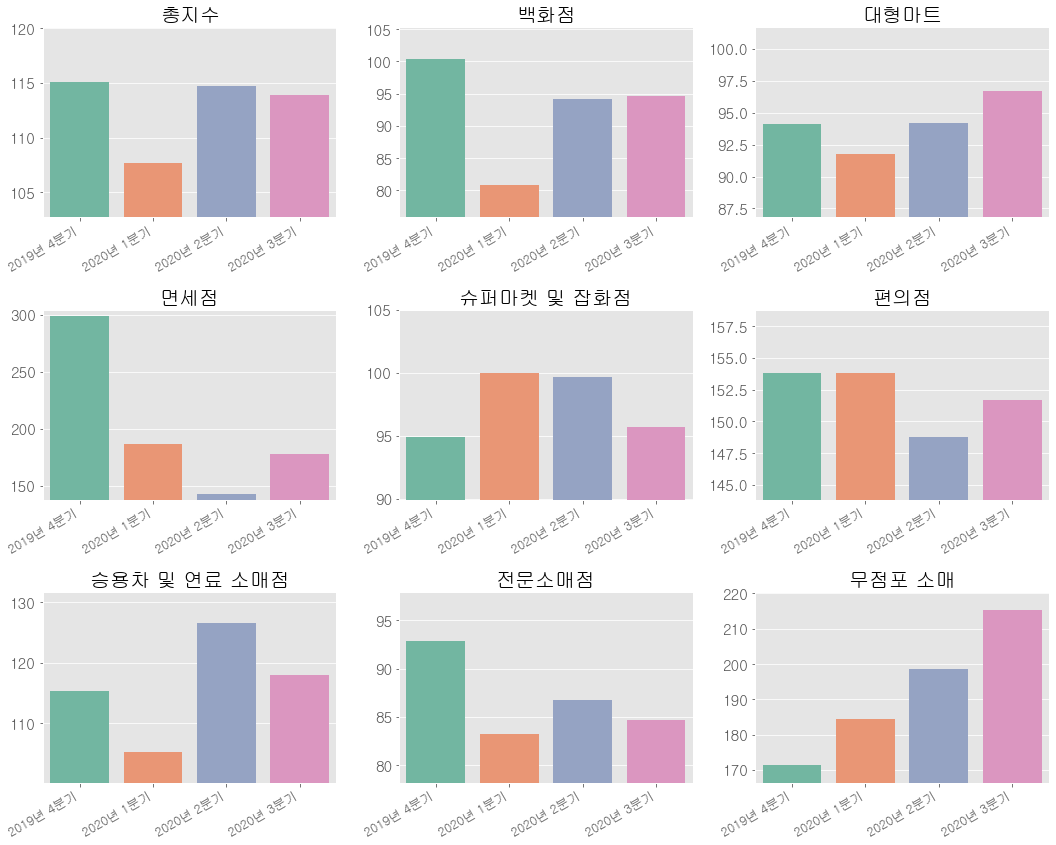

In [4]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i in range(len(axes)):
    sns.barplot(data.index[3:], data.iloc[3:, i], ax=axes[i], palette='Set2')
    axes[i].set_title(data.columns[i], fontsize=20)
    plt.setp(axes[i].get_xticklabels(), rotation=30, ha='right', fontsize=12.5)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].set_ylim((np.min(data.iloc[3:, i]) - 5, np.max(data.iloc[3:, i]) + 5))
    
plt.tight_layout()
plt.show()


총지수를 보면 코로나 초기 타격을 받았다가 다시 회복한 것을 알 수 있습니다.

업태별 상황을 보도록 하겠씁니다.

#### 백화점:
백화점의 경우 코로나 초기 심각한 타격을 받았습니다.그러나 금방 회복하였습니다.

#### 대형마트: 
대형마트의 경우 코로나 이전부터 서서히 감소하는 추세였습니다. 오히려 코로나 이후 감소량이 적어진 것을 확인할 수 있습니다.

#### 면세점: 
면세점은 코로나에 가장 심각한 타격을 입었습니다. 코로나 이전까지 급격한 상승폭을 보였으나 코로나 타격 이후 회복을 못하고 있습니다.

#### 슈퍼마켓 및 잡화점:
슈퍼마켓 및 잡화점은 코로나 이후 오히려 호황이었습니다. 5월 이후 조금씩 감소하였으나 최근 다시 회복세를 보이고 있습니다.

#### 편의점: 
편의점 같은 경우 코로나에 타격을 받았다가 회복 중인 것으로 보입니다. 다만 8,9월 매출이 하락하는 모양을 보입니다.

#### 승용차 및 연료 소매점:
승용차 및 연료 소매점(주유소 등)은 2월에 잠시 주춤하였으나 빠르게 회복하였습니다.

#### 전문소매점: 
전문소매점(가전, 가구, 의류 등)의 경우 코로나 타격을 받았으나 어느정도 회복하였습니다.

#### 무점포 소매:
가장 도드라지는 것은 무점포 소매(온라인 쇼핑몰 등) 입니다. 

코로나 이전부터 꾸준히 상승세를 보였고 코로나 이후 오히려 더 높은 성장세를 보입니다.무점포 소매의 성장에는 언택트 트렌드와 사회적 거리두기가 영향을 준것으로 보입니다.

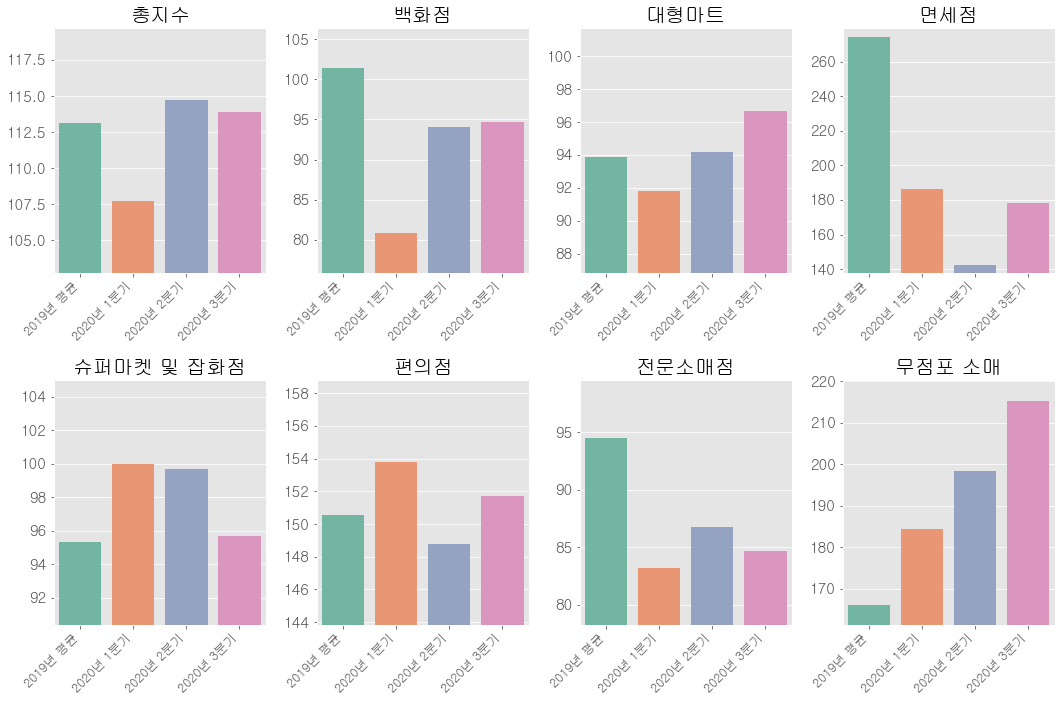

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
axes = axes.ravel()

for i in range(len(axes)):
    sns.barplot(process_data.index, process_data.iloc[:, i], ax=axes[i], palette='Set2')
    axes[i].set_title(process_data.columns[i], fontsize=20)
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right', fontsize=12.5)
    axes[i].set_ylabel('')
    axes[i].set_ylim((np.min(process_data.iloc[:, i]) - 5, np.max(process_data.iloc[:, i]) + 5))
    
plt.tight_layout()
plt.show()